##### Atividade 1 - Mineração de Dados
##### João Santos de Sousa Filho

In [68]:
from sklearn import datasets
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
%matplotlib inline

#### Introdução

In [69]:
dados = datasets.load_iris()
df_iris = pd.DataFrame (dados['data'], columns=dados['feature_names'])
df_iris['species'] = dados['target']

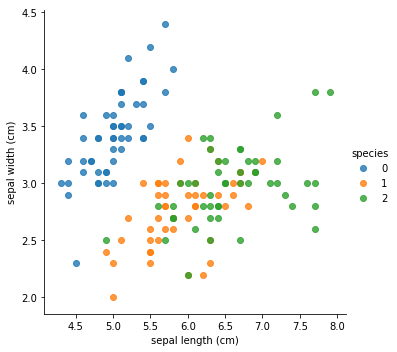

In [70]:
sns.lmplot( x= 'sepal length (cm)', y= 'sepal width (cm)',
data=df_iris, fit_reg=False, hue= 'species', legend=True)

### Questão 1

In [71]:
#retirando o target do conjunto de dados
X_iris = df_iris.drop('species',axis=1)

In [72]:
#gerando a tabela dos valores de classficação
y_iris = df_iris['species'].values

In [73]:
#importando o classificador
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

In [74]:
knn_iris = KNeighborsClassifier(n_neighbors = 3)

#Separando um conjunto para treinamento e outro para testes
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size = 0.2, random_state = 1, stratify = y_iris)

#treino
knn_iris.fit(X_train_iris,y_train_iris)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [75]:
#predizendo os resultados(dos testes) com base no trainamento
knn_iris.predict(X_test_iris)

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

In [76]:
#medindo o acuracia de 0 a 1
knn_iris.score(X_test_iris,y_test_iris)

0.9666666666666667

### Questão 2

<p>Abaixo, os dados são armazenados em df_crx em seguida retiramos uma instancia positiva('+') para teste futuro. Após isso salvamos os valores da classificação e retiramos da tabela.</p>

In [82]:
#pegando base de dados
df_crx = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data',sep=',')

#solução do erro de tipos: mapeando os valores 'object' para valores numericos
#o valor + ficou como 0 

from sklearn import preprocessing
for column in df_crx:
    if (df_crx[column].dtype == type(object)):
        le = preprocessing.LabelEncoder()
        df_crx[column] = le.fit_transform(df_crx[column])
        


<p>Com os valores tratados, comerçamos os a separação dos dados e treinamento</p>

In [83]:
#instancia 689 retirada para teste, classe negativa (1)
XT = df_crx.drop('+',axis=1).loc[688]

#retirando a instancia de teste
X_crx = df_crx.drop(688,axis=0)

#seperando os valores
y_crx = X_crx['+'].values
X_crx = X_crx.drop('+',axis=1)

##### Abaixo segue a separação de valores para teste(alem do valor individual que foi separado acima) e treino.

In [102]:
knn_crx = KNeighborsClassifier(n_neighbors = 13)

#Separando um conjunto para treinamento e outro para testes
X_train_crx, X_test_crx, y_train_crx, y_test_crx = train_test_split(X_crx, y_crx, test_size = 0.2, random_state = 1, stratify = y_crx)

#treino
knn_crx.fit(X_train_crx,y_train_crx)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

<p>Considerando o array XT para teste de predição, temos que transforma-lo em um array 2D visto que é a entrada do metodo predict().</p>

In [103]:
import numpy as np
exemple_unique = np.array(XT)
exemple_unique = exemple_unique.reshape(1,-1)

knn_crx.predict(exemple_unique)

array([1])

In [104]:
acuracia = knn_crx.score(X_test_crx,y_test_crx)*100
print("Acurácia: {0:.2f}%".format(acuracia))

Acurácia: 68.12%


<p>Verificamos que a predição aceitou o exemplo unico que resultou no valor 1, equivalente a negativo e a acurácia foi de 68.12%</p>